<a href="https://colab.research.google.com/github/KrishnaSChavan/Cancer_cell_detection/blob/main/Cancer_GAN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data import and initilization

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google. colab import files
files.upload()

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [02:24<00:00, 41.1MB/s]
100% 5.20G/5.20G [02:24<00:00, 38.5MB/s]


In [7]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras import layers

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [9]:
import zipfile
zip_r = zipfile.ZipFile('skin-cancer-mnist-ham10000.zip')
zip_r.extractall()
zip_r.close()

In [10]:
import pandas as pd
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
y = data['label']
x = data.drop(columns = ['label'])

In [11]:
x = np.array(x).reshape(-1,28,28,3)
x = (x-np.mean(x))/np.std(x)
x_train = x
print('Shape of X :',x.shape)

Shape of X : (10015, 28, 28, 3)


# second model

In [12]:
batch_size = 128
train_dataset_1 = tf.keras.preprocessing.image_dataset_from_directory("/content/HAM10000_images_part_1", label_mode = None , image_size = (28,28), batch_size = batch_size )
train_dataset_2 = tf.keras.preprocessing.image_dataset_from_directory("/content/HAM10000_images_part_2", label_mode = None , image_size = (28,28), batch_size = batch_size )
train_dataset_3 = tf.keras.preprocessing.image_dataset_from_directory("/content/ham10000_images_part_1", label_mode = None , image_size = (28,28), batch_size = batch_size )
train_dataset_4 = tf.keras.preprocessing.image_dataset_from_directory("/content/ham10000_images_part_2", label_mode = None , image_size = (28,28), batch_size = batch_size )
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/HAM10000_images_part_1", label_mode = None , image_size = (28,28), batch_size = batch_size )


Found 5000 files belonging to 1 classes.
Found 5015 files belonging to 1 classes.
Found 5000 files belonging to 1 classes.
Found 5015 files belonging to 1 classes.
Found 5000 files belonging to 1 classes.


In [13]:
x.shape

(10015, 28, 28, 3)

In [13]:
train_dataset_1

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name=None)>

In [15]:
train_dataset_1 = train_dataset_1.map( lambda x: (x / 127.5) - 15)
train_dataset_2 = train_dataset_2.map( lambda x: (x / 127.5) - 15)

In [ ]:
plt.figure (figsize = (12, 8))
for images in train_dataset.take (1):
    for i in range (25):
        ax = plt.subplot (5, 5, i + 1)
        plt.imshow ( images [i]. numpy ( ) )
        plt.axis ( 'off')

In [14]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/HAM10000_images_part_1", label_mode = None , image_size = (64,64), batch_size = batch_size )

Found 5000 files belonging to 1 classes.


In [15]:
buffer_size = 10015
Batch_size =128

train_dataset = tf.data.Dataset.from_tensor_slices(x).shuffle(buffer_size).batch(Batch_size)

In [ ]:
plt.figure (figsize = (12, 8))
for images in train_dataset.take (1):
    for i in range (25):
        ax = plt.subplot (5, 5, i + 1)
        plt.imshow ( images [i]. numpy ( ) )
        plt.axis ( 'off')

In [ ]:
for batch in train_dataset:
    plt.imshow (batch [0])
    print ('Image_shape', batch[0].shape)
    break

In [23]:
init_weights_kernel = tf.keras.initializers. RandomNormal (mean = 0.0, stddev = 0.02 )

In [18]:
def generator_model():

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(100,)))
    model.add(layers.Dense(7 * 7 * 49))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Reshape((7, 7, 49)))
    model.add(layers.Conv2DTranspose(128, kernel_size=4, padding='same', strides=2,
                                     use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    # model.add(layers.Conv2DTranspose(64, kernel_size=4, padding='same', strides=2,
    #                                   use_bias=False))
    # model.add(layers.BatchNormalization())
    # model.add(layers.ReLU())
    # model.add(layers.Conv2DTranspose(32, kernel_size=4, padding='same', strides=2,
    #                                   use_bias=False))
    # model.add(layers.BatchNormalization())
    # model.add(layers.ReLU())
    model.add(layers.Conv2DTranspose(3, kernel_size=4, padding='same', strides=2, activation='tanh',
                                      use_bias=False))

    return model

In [19]:
generator = generator_model ()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2401)              242501    
                                                                 
 batch_normalization (BatchN  (None, 2401)             9604      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 2401)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 49)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      100352    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)      5

In [20]:
noise = tf.random. normal ( [1, 100])
generated_image = generator (noise, training = False)
generated_image.shape

TensorShape([1, 28, 28, 3])

In [24]:
# def discriminator_model():

#     model = tf.keras. Sequential()
#     model.add(layers.Conv2D(32, kernel_size=3, strides=2, input_shape=(64, 64, 3), padding='same',
#         kernel_initializer=init_weights_kernel, use_bias=False))
#     model.add(layers. LeakyReLU (alpha = 0.2 ))
#     model.add (layers. Dropout (0.3 ))
#     model.add (layers. Conv2D(64, kernel_size = 3, strides = 2, padding = 'same',
#         kernel_initializer = init_weights_kernel, use_bias = False))
#     model. add (layers. ZeroPadding2D (padding = ((0, 1), (0, 1))))
#     model. add(layers. BatchNormalization ( ))
#     model. add(layers. LeakyReLU(alpha = 0.2))
#     model.add(layers. Dropout (0.25 ))

#     model. add(layers. Conv2D(128, kernel_size = 3, strides = 2, padding = 'same',
#         kernel_initializer = init_weights_kernel, use_bias = False))
#     model. add(layers. BatchNormalization ( ))
#     model.add(layers.LeakyReLU (alpha = 0.2 ))
#     model.add(layers. Dropout (0.3 ))
#     model. add (layers.Conv2D(256, kernel_size = 3, strides=1, padding = 'same',
#         kernel_initializer = init_weights_kernel, use_bias = False))
#     model. add (layers. BatchNormalization ( ))
#     model. add(layers. LeakyReLU(alpha = 0.2))
#     model. add (layers. Dropout (0.3 ))
#     model.add(layers.Flatten ( ))
#     model. add (layers. Dense(1, activation = 'sigmoid' ))

#     return model

def discriminator_model():

    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, kernel_size=3, strides=2, input_shape=(28, 28, 3), padding='same',
        kernel_initializer=init_weights_kernel, use_bias=False))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(64, kernel_size=3, strides=2, padding='same',
        kernel_initializer=init_weights_kernel, use_bias=False))
    model.add(layers.ZeroPadding2D(padding=((0, 1), (0, 1))))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding='same',
        kernel_initializer=init_weights_kernel, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(256, kernel_size=3, strides=1, padding='same',
        kernel_initializer=init_weights_kernel, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [25]:
discriminator = discriminator_model ()
discriminator.summary ( )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        864       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18432     
                                                                 
 zero_padding2d (ZeroPadding  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                      

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [28]:
output = discriminator (generated_image)
print (output)

tf.Tensor([[0.49997985]], shape=(1, 1), dtype=float32)


In [29]:
be = tf.keras. losses. BinaryCrossentropy ( )

In [30]:
def discriminator_loss (real_output, fake_output):
    real_loss = be(tf.ones_like (real_output), real_output)
    fake_loss = be(tf.zeros_like (fake_output), fake_output)
    total_loss = real_loss + fake_loss

    return total_loss

In [31]:
def generator_loss (fake_output):

    gen_loss = be(tf.ones_like (fake_output), fake_output)
    return gen_loss

In [32]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5)

In [33]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path. join(checkpoint_dir, 'ckpt')
checkpoint = tf. train.Checkpoint (generator_optimizer = generator_optimizer,
                    discriminator_optimizer = discriminator_optimizer,
                    generator = generator,
                    discriminator = discriminator)

In [34]:
epochs = 40
noise_dim = 100
num_examples_to_generate = 16
seed = tf. random. normal ( [num_examples_to_generate, noise_dim])

In [35]:
def generate_and_plot_images (model, epoch, test_input):
    predictions = model (test_input, training = False)
    fig = plt.figure(figsize = (8, 4))
    for i in range (predictions.shape [0]):
        plt.subplot (4, 4, i + 1)
        plt.imshow((predictions[i,:, :, :] * 0.5 + 0.5))
        plt.axis ( 'off')
    plt. savefig ('image_at_epoch_{:04d} •png' .format (epoch) )
    plt.show ( )

In [36]:
@tf.function
def train_step (images) :
    noise = tf. random. normal ( [batch_size, noise_dim])
    with tf. GradientTape ( ) as gen_tape, tf.GradientTape ( ) as disc_tape:
        generated_images = generator (noise, training = True)

        real_output = discriminator (images, training = True)
        fake_output = discriminator (generated_images, training = True)
        gen_loss = generator_loss (fake_output)
        disc_loss = discriminator_loss (real_output, fake_output)

    gradients_of_generator = gen_tape.gradient (gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient (disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients (zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return (gen_loss, disc_loss, tf.reduce_mean (real_output), tf.reduce_mean (fake_output))

In [37]:
def train (dataset, epochs):
    gen_loss_list = []
    disc_loss_list = []
    real_score_list = []
    fake_score_list = []
    for epoch in tqdm(range (epochs) ) :
        start = time.time ( )
        num_batches = len (dataset)
        print ('Training started with epoch {epoch + 1) with (num batches) batches..')
        total_gen_loss = 0
        total_disc_loss = 0
        for batch in dataset:
            generator_loss, discriminator_loss, real_score, fake_score = train_step(batch)
            total_gen_loss += generator_loss
            total_disc_loss += discriminator_loss
        mean_gen_loss = total_gen_loss / num_batches
        mean_disc_loss = total_disc_loss / num_batches

        print ('Losses after epoch %5d: generator %.3f, discriminator %.3f, \real score %.2f%%, fake score %.2f%%' %
                (epoch+1, generator_loss, discriminator_loss, real_score * 100, fake_score * 100))

        generate_and_plot_images (generator, epoch + 1, seed)
        gen_loss_list.append(mean_gen_loss)
        disc_loss_list.append(mean_disc_loss)
        real_score_list.append(real_score)
        fake_score_list.append (fake_score)
        if (epoch + 1) % 10 == 0:
            checkpoint.save (file_prefix = checkpoint_prefix)
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time () - start))
    return gen_loss_list, disc_loss_list, real_score_list, fake_score_list

  0%|          | 0/40 [00:00<?, ?it/s]

Training started with epoch {epoch + 1) with (num batches) batches..
eal score 98.65%, fake score 0.66%


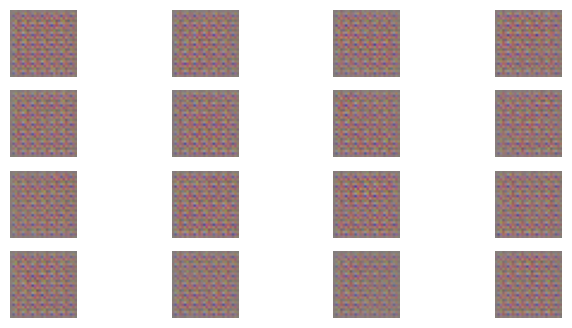

  2%|▎         | 1/40 [00:09<06:14,  9.59s/it]

Time for epoch 1 is 9.590848684310913 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.78%, fake score 0.70%


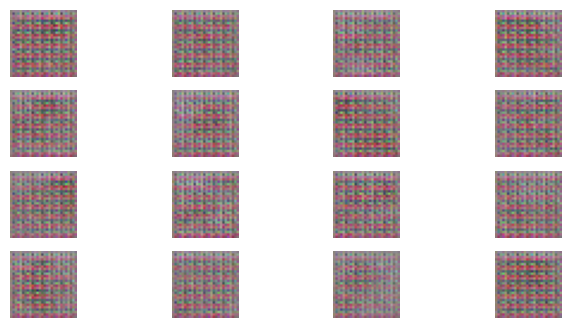

  5%|▌         | 2/40 [00:11<03:19,  5.24s/it]

Time for epoch 2 is 2.19893479347229 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 86.91%, fake score 0.75%


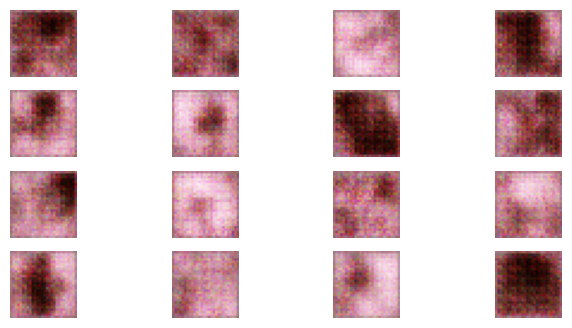

  8%|▊         | 3/40 [00:14<02:34,  4.19s/it]

Time for epoch 3 is 2.929671049118042 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 97.31%, fake score 2.65%


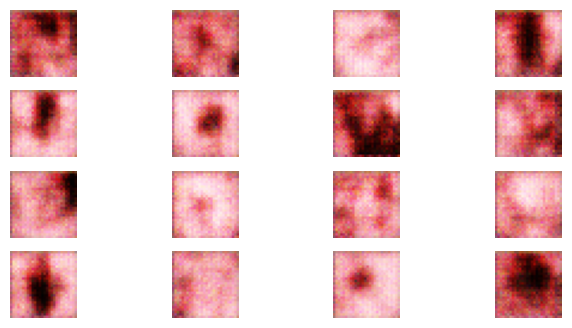

 10%|█         | 4/40 [00:16<01:54,  3.19s/it]

Time for epoch 4 is 1.6482727527618408 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 95.70%, fake score 3.46%


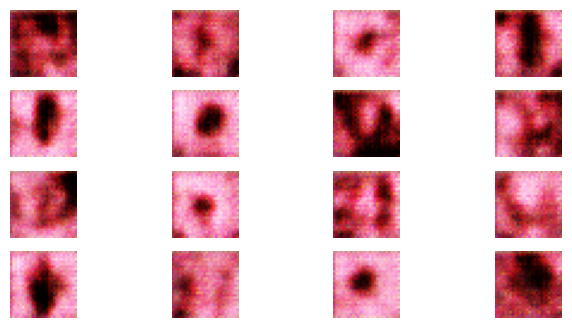

 12%|█▎        | 5/40 [00:18<01:31,  2.63s/it]

Time for epoch 5 is 1.6213269233703613 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 97.81%, fake score 0.42%


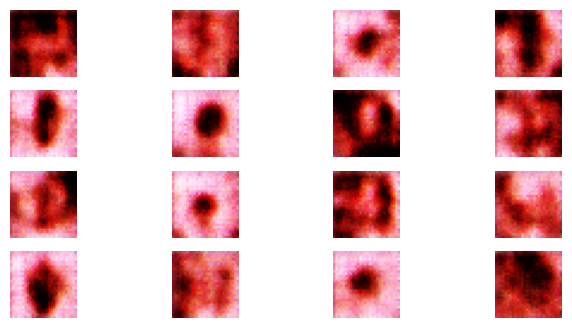

 15%|█▌        | 6/40 [00:19<01:17,  2.29s/it]

Time for epoch 6 is 1.6369104385375977 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.77%, fake score 0.33%


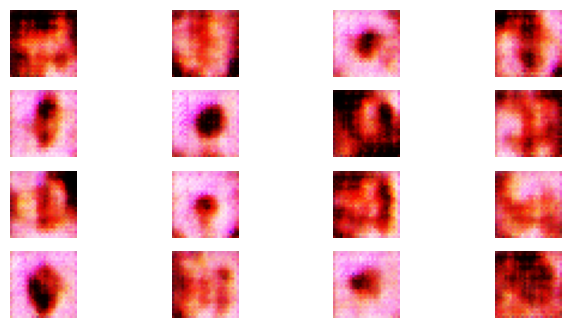

 18%|█▊        | 7/40 [00:21<01:08,  2.08s/it]

Time for epoch 7 is 1.6290695667266846 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 93.65%, fake score 2.02%


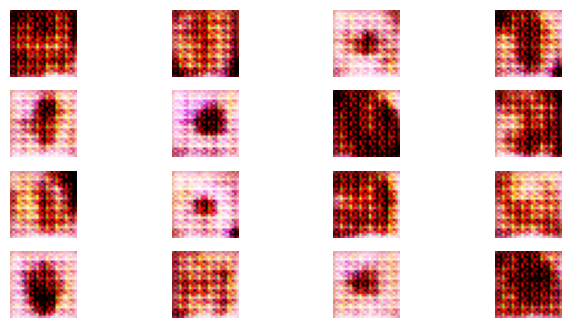

 20%|██        | 8/40 [00:23<01:09,  2.18s/it]

Time for epoch 8 is 2.386286497116089 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 95.39%, fake score 1.82%


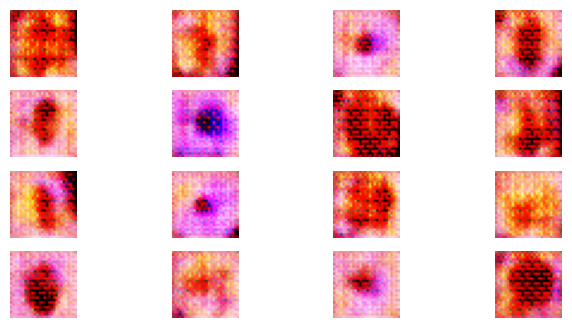

 22%|██▎       | 9/40 [00:25<01:06,  2.15s/it]

Time for epoch 9 is 2.0778005123138428 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 98.51%, fake score 0.89%


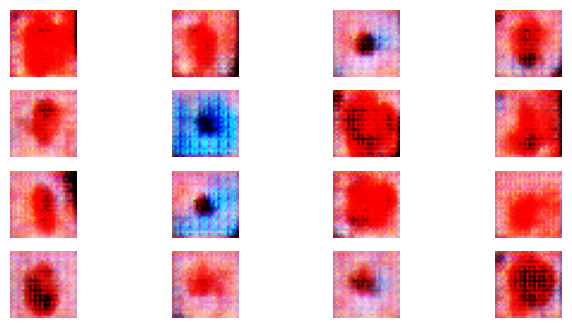

 25%|██▌       | 10/40 [00:27<01:01,  2.06s/it]

Time for epoch 10 is 1.875864028930664 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 96.40%, fake score 0.88%


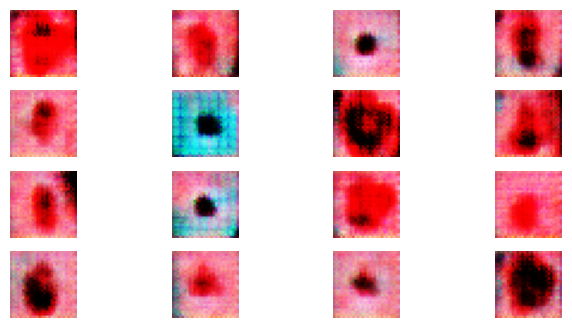

 28%|██▊       | 11/40 [00:29<00:56,  1.94s/it]

Time for epoch 11 is 1.6460235118865967 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 97.64%, fake score 1.97%


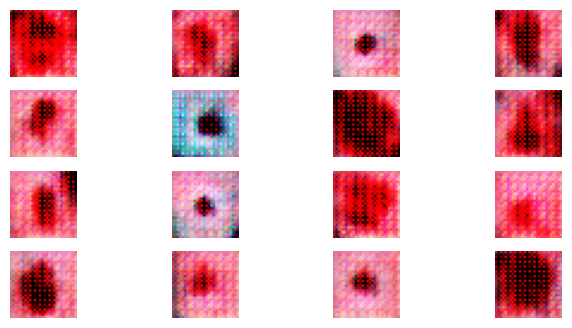

 30%|███       | 12/40 [00:31<00:54,  1.94s/it]

Time for epoch 12 is 1.94938063621521 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.86%, fake score 1.01%


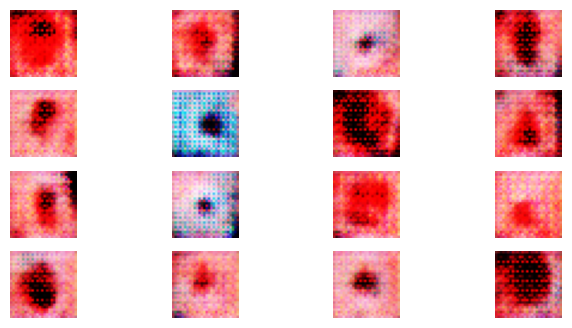

 32%|███▎      | 13/40 [00:33<00:52,  1.94s/it]

Time for epoch 13 is 1.9465277194976807 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.91%, fake score 0.34%


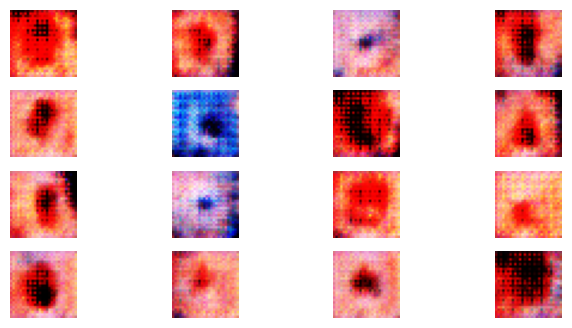

 35%|███▌      | 14/40 [00:34<00:48,  1.87s/it]

Time for epoch 14 is 1.680530071258545 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.91%, fake score 0.26%


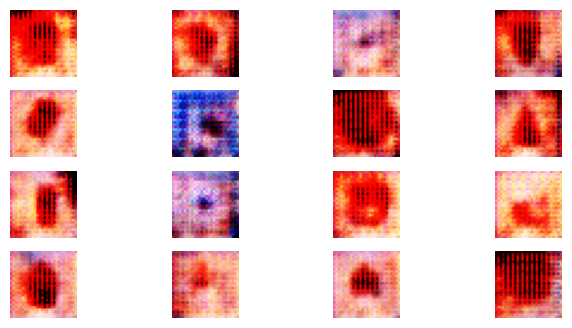

 38%|███▊      | 15/40 [00:36<00:45,  1.81s/it]

Time for epoch 15 is 1.6718835830688477 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 98.51%, fake score 0.13%


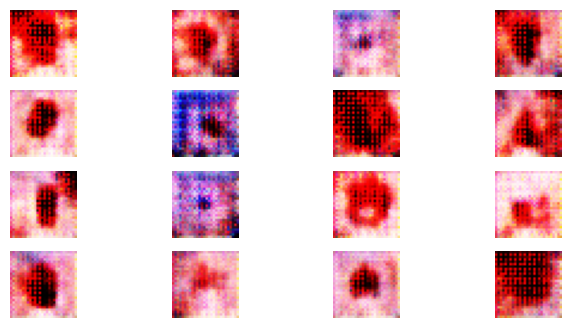

 40%|████      | 16/40 [00:38<00:44,  1.86s/it]

Time for epoch 16 is 1.979318618774414 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.92%, fake score 0.09%


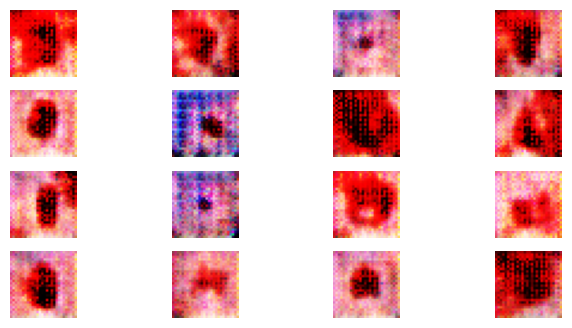

 42%|████▎     | 17/40 [00:40<00:43,  1.91s/it]

Time for epoch 17 is 2.0135228633880615 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.97%, fake score 0.42%


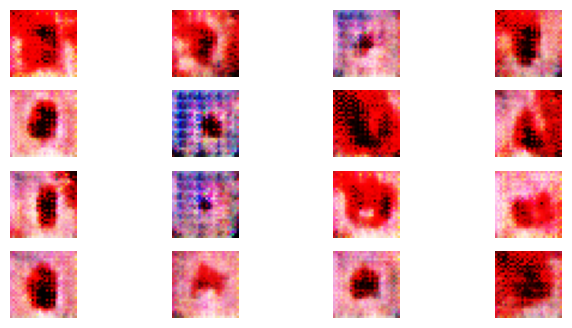

 45%|████▌     | 18/40 [00:43<00:45,  2.07s/it]

Time for epoch 18 is 2.443011999130249 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.84%, fake score 0.05%


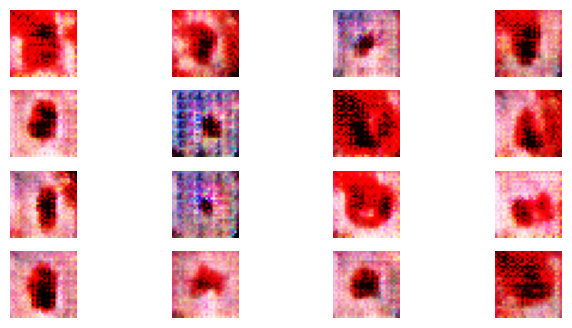

 48%|████▊     | 19/40 [00:46<00:50,  2.39s/it]

Time for epoch 19 is 3.1299867630004883 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.99%, fake score 0.41%


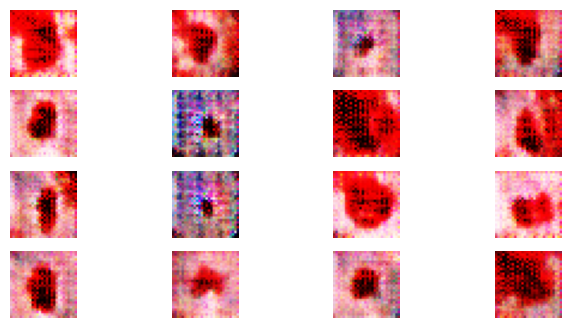

 50%|█████     | 20/40 [00:51<01:04,  3.25s/it]

Time for epoch 20 is 5.230020046234131 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.95%, fake score 0.03%


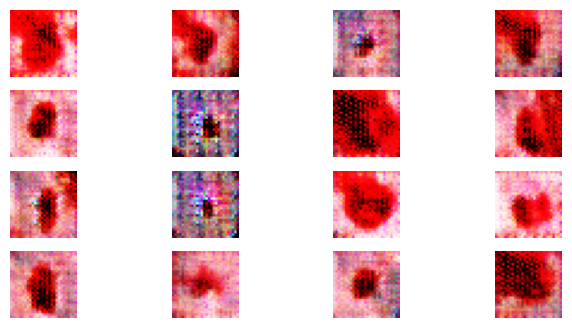

 52%|█████▎    | 21/40 [00:53<00:53,  2.80s/it]

Time for epoch 21 is 1.7588672637939453 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 94.60%, fake score 0.06%


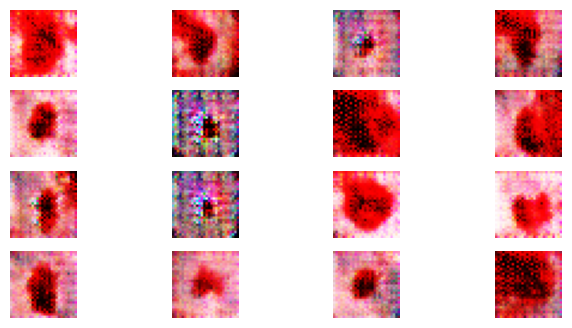

 55%|█████▌    | 22/40 [00:55<00:46,  2.57s/it]

Time for epoch 22 is 2.0146255493164062 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 89.37%, fake score 0.29%


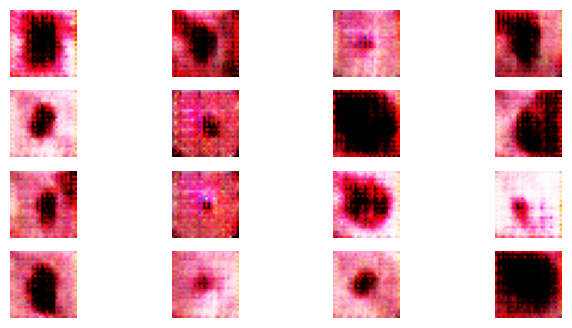

 57%|█████▊    | 23/40 [00:56<00:39,  2.31s/it]

Time for epoch 23 is 1.7050776481628418 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.84%, fake score 1.04%


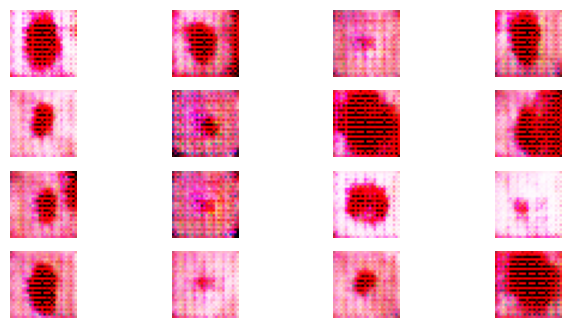

 60%|██████    | 24/40 [00:59<00:37,  2.37s/it]

Time for epoch 24 is 2.496239185333252 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.09%, fake score 0.66%


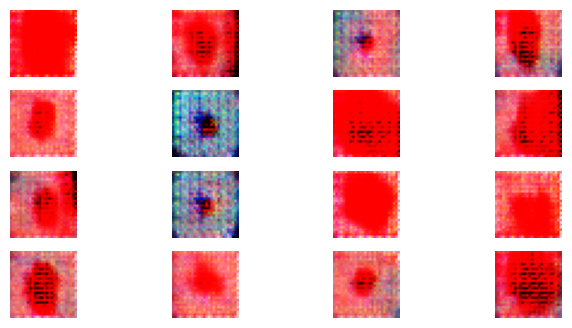

 62%|██████▎   | 25/40 [01:01<00:33,  2.24s/it]

Time for epoch 25 is 1.94148588180542 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.96%, fake score 0.27%


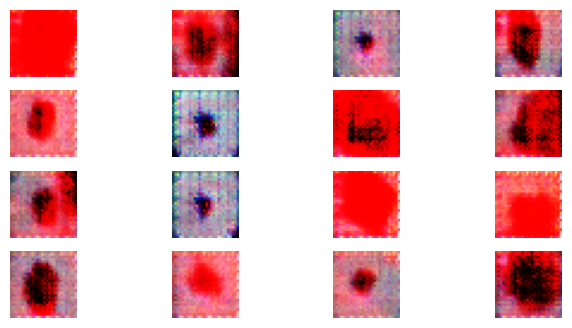

 65%|██████▌   | 26/40 [01:04<00:35,  2.55s/it]

Time for epoch 26 is 3.2677576541900635 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.97%, fake score 0.08%


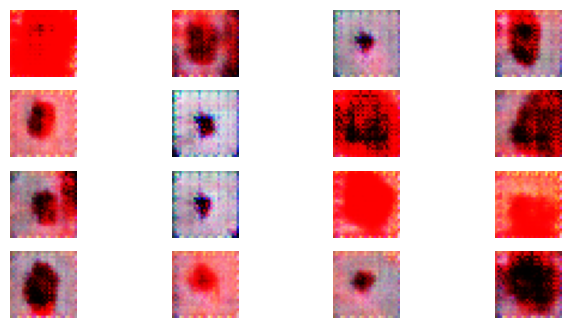

 68%|██████▊   | 27/40 [01:07<00:33,  2.54s/it]

Time for epoch 27 is 2.507227659225464 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.86%, fake score 0.09%


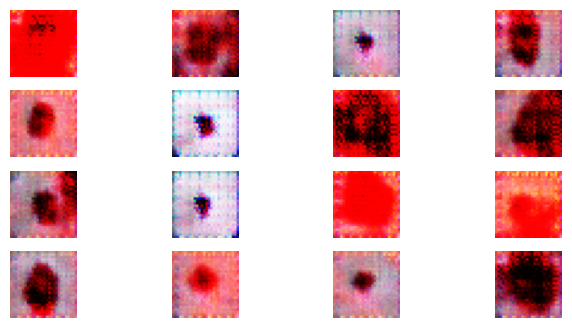

 70%|███████   | 28/40 [01:09<00:28,  2.35s/it]

Time for epoch 28 is 1.9102911949157715 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.97%, fake score 0.27%


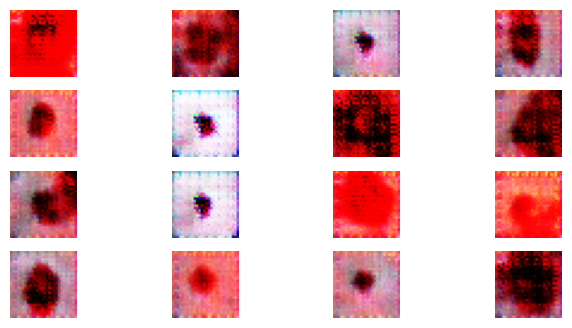

 72%|███████▎  | 29/40 [01:10<00:23,  2.17s/it]

Time for epoch 29 is 1.7397665977478027 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.98%, fake score 0.07%


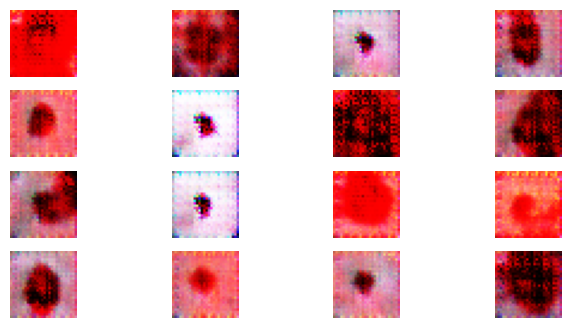

 75%|███████▌  | 30/40 [01:12<00:20,  2.08s/it]

Time for epoch 30 is 1.86104154586792 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.64%, fake score 0.05%


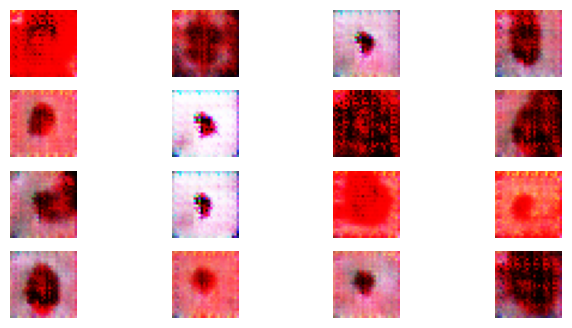

 78%|███████▊  | 31/40 [01:14<00:17,  1.97s/it]

Time for epoch 31 is 1.7111852169036865 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.30%, fake score 0.03%


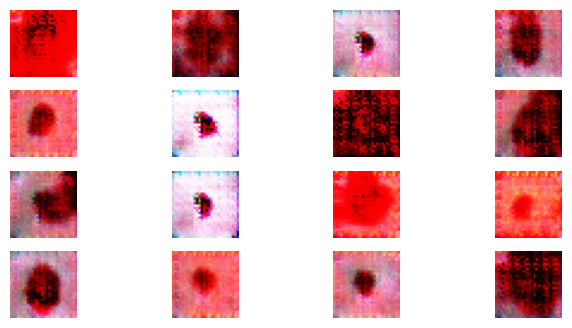

 80%|████████  | 32/40 [01:17<00:19,  2.40s/it]

Time for epoch 32 is 3.40525484085083 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.99%, fake score 0.07%


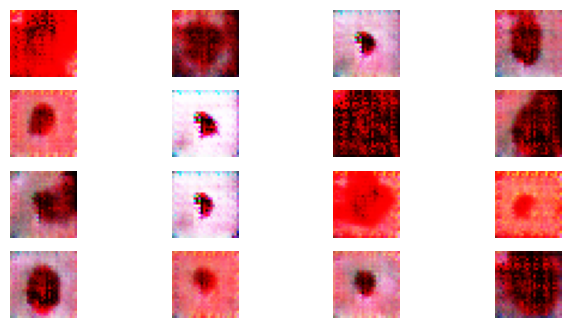

 82%|████████▎ | 33/40 [01:20<00:17,  2.46s/it]

Time for epoch 33 is 2.5818567276000977 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.99%, fake score 0.08%


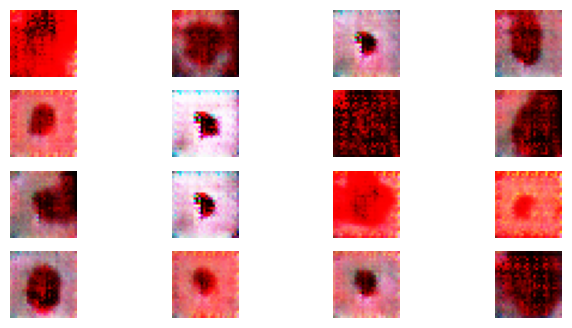

 85%|████████▌ | 34/40 [01:22<00:13,  2.25s/it]

Time for epoch 34 is 1.7535052299499512 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 100.00%, fake score 0.02%


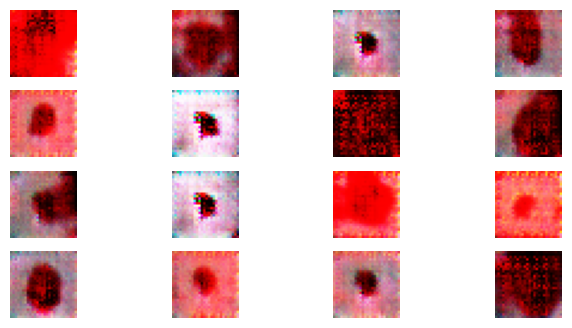

 88%|████████▊ | 35/40 [01:23<00:10,  2.09s/it]

Time for epoch 35 is 1.7096943855285645 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.86%, fake score 0.03%


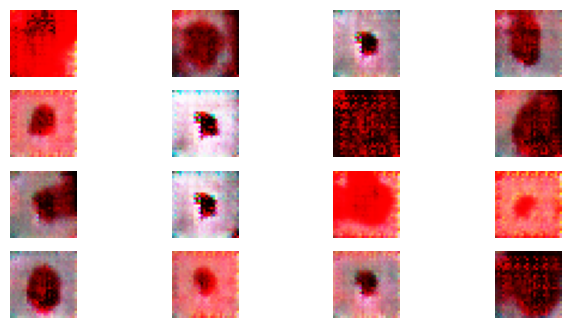

 90%|█████████ | 36/40 [01:25<00:07,  1.97s/it]

Time for epoch 36 is 1.7024965286254883 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 100.00%, fake score 0.03%


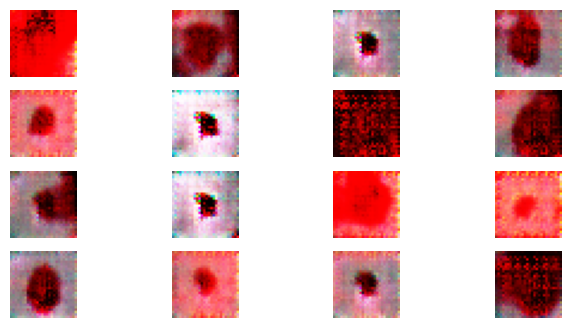

 92%|█████████▎| 37/40 [01:27<00:05,  1.98s/it]

Time for epoch 37 is 2.003556251525879 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 99.92%, fake score 0.15%


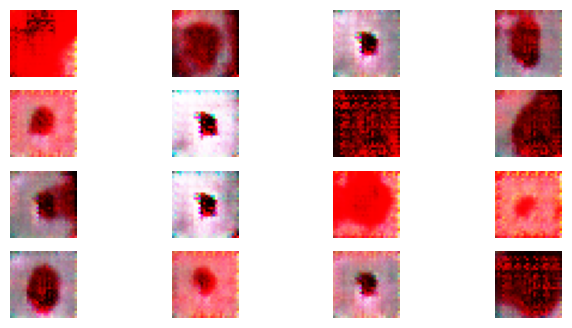

 95%|█████████▌| 38/40 [01:29<00:03,  1.98s/it]

Time for epoch 38 is 1.9556868076324463 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 100.00%, fake score 0.02%


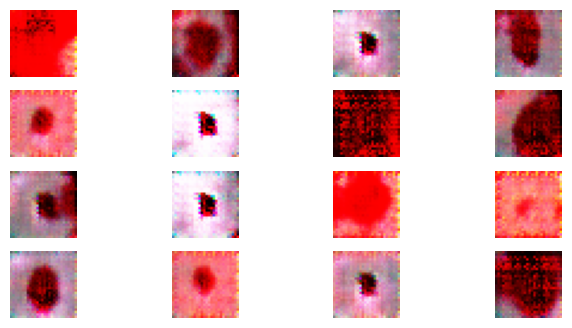

 98%|█████████▊| 39/40 [01:31<00:01,  1.95s/it]

Time for epoch 39 is 1.869819164276123 sec
Training started with epoch {epoch + 1) with (num batches) batches..
eal score 100.00%, fake score 0.16%


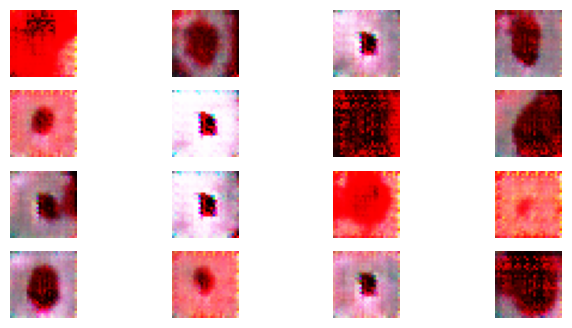

100%|██████████| 40/40 [01:33<00:00,  2.33s/it]

Time for epoch 40 is 1.863447666168213 sec


In [38]:
gen_loss_epochs, disc_loss_epochs, real_score_list, fake_score_list = train(train_dataset, epochs = epochs)

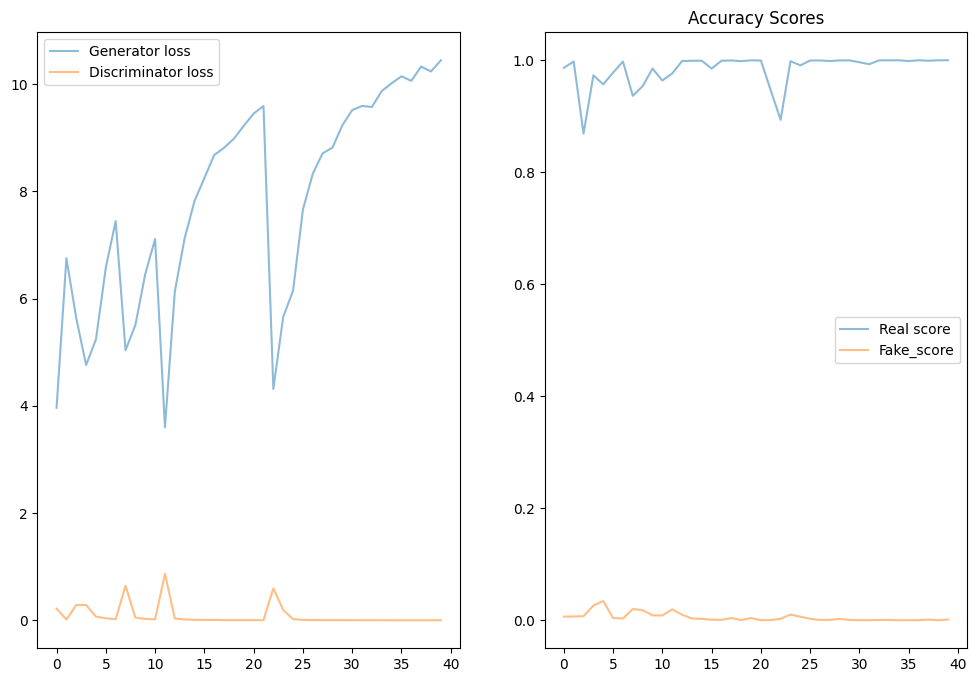

In [39]:
fig, (ax1,ax2) = plt.subplots (1, 2, figsize = (12, 8))
ax1.plot (gen_loss_epochs, label = 'Generator loss', alpha = 0.5)
ax1.plot (disc_loss_epochs, label = 'Discriminator loss', alpha = 0.5)
ax1. legend ( )
ax2.set_title ('Training Losses')
ax2.plot (real_score_list, label = 'Real score', alpha = 0.5)
ax2.plot(fake_score_list, label = 'Fake_score', alpha = 0.5)
ax2.set_title ('Accuracy Scores')
ax2. legend ( )